In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from plotting import *

In [4]:
dataDir = "../results/imagenet1000/"

In [5]:
list_of_runs = []
# If list is empty, all runs of the following experiment will be loaded
experimentName='IMAGENET1000-GPU-CG'

In [6]:
M = 32

### If list of runs is empty, load all runs from [experimentName]

In [7]:
list_of_runs = []
if len(list_of_runs)==0:
    for folder in listdir(dataDir):
        if folder[:len(experimentName)]==experimentName:
            print folder
            list_of_runs.append(folder)

IMAGENET1000-GPU-CG-1-0.005-0.0
IMAGENET1000-GPU-CG-1-0.005-0.3
IMAGENET1000-GPU-CG-1-0.005-0.6
IMAGENET1000-GPU-CG-1-0.005-0.9
IMAGENET1000-GPU-CG-1-0.01-0.0
IMAGENET1000-GPU-CG-1-0.01-0.3
IMAGENET1000-GPU-CG-1-0.01-0.6
IMAGENET1000-GPU-CG-1-0.01-0.9
IMAGENET1000-GPU-CG-1-0.05-0.0
IMAGENET1000-GPU-CG-1-0.05-0.3
IMAGENET1000-GPU-CG-1-0.05-0.6
IMAGENET1000-GPU-CG-1-0.05-0.9
IMAGENET1000-GPU-CG-32-0.005-0.0
IMAGENET1000-GPU-CG-32-0.005-0.3
IMAGENET1000-GPU-CG-32-0.005-0.6
IMAGENET1000-GPU-CG-32-0.005-0.9
IMAGENET1000-GPU-CG-32-0.01-0.0
IMAGENET1000-GPU-CG-32-0.01-0.3
IMAGENET1000-GPU-CG-32-0.01-0.6
IMAGENET1000-GPU-CG-32-0.01-0.9
IMAGENET1000-GPU-CG-32-0.05-0.0
IMAGENET1000-GPU-CG-32-0.05-0.3
IMAGENET1000-GPU-CG-32-0.05-0.6
IMAGENET1000-GPU-CG-32-0.05-0.9


### Load listed runs

In [8]:
loss_results, acc_results = load_list_of_runs(list_of_runs,data_dir=dataDir)

Loading run logs:
-----------------
IMAGENET1000-GPU-CG-1-0.005-0.0
IMAGENET1000-GPU-CG-1-0.005-0.3
IMAGENET1000-GPU-CG-1-0.005-0.6
IMAGENET1000-GPU-CG-1-0.005-0.9
IMAGENET1000-GPU-CG-1-0.01-0.0
IMAGENET1000-GPU-CG-1-0.01-0.3
IMAGENET1000-GPU-CG-1-0.01-0.6
IMAGENET1000-GPU-CG-1-0.01-0.9
IMAGENET1000-GPU-CG-1-0.05-0.0
IMAGENET1000-GPU-CG-1-0.05-0.3
IMAGENET1000-GPU-CG-1-0.05-0.6
IMAGENET1000-GPU-CG-1-0.05-0.9
IMAGENET1000-GPU-CG-32-0.005-0.0
IMAGENET1000-GPU-CG-32-0.005-0.3
IMAGENET1000-GPU-CG-32-0.005-0.6
IMAGENET1000-GPU-CG-32-0.005-0.9
IMAGENET1000-GPU-CG-32-0.01-0.0
IMAGENET1000-GPU-CG-32-0.01-0.3
IMAGENET1000-GPU-CG-32-0.01-0.6
IMAGENET1000-GPU-CG-32-0.01-0.9
IMAGENET1000-GPU-CG-32-0.05-0.0
IMAGENET1000-GPU-CG-32-0.05-0.3
IMAGENET1000-GPU-CG-32-0.05-0.6
IMAGENET1000-GPU-CG-32-0.05-0.9


## Load times

In [9]:
times = load_times(list_of_runs, M=M, data_dir=dataDir)

Loading run logs:
-----------------
IMAGENET1000-GPU-CG-1-0.005-0.0
IMAGENET1000-GPU-CG-1-0.005-0.3
IMAGENET1000-GPU-CG-1-0.005-0.6
IMAGENET1000-GPU-CG-1-0.005-0.9
IMAGENET1000-GPU-CG-1-0.01-0.0
IMAGENET1000-GPU-CG-1-0.01-0.3
IMAGENET1000-GPU-CG-1-0.01-0.6
IMAGENET1000-GPU-CG-1-0.01-0.9
IMAGENET1000-GPU-CG-1-0.05-0.0
IMAGENET1000-GPU-CG-1-0.05-0.3
IMAGENET1000-GPU-CG-1-0.05-0.6
IMAGENET1000-GPU-CG-1-0.05-0.9
IMAGENET1000-GPU-CG-32-0.005-0.0
IMAGENET1000-GPU-CG-32-0.005-0.3
IMAGENET1000-GPU-CG-32-0.005-0.6
IMAGENET1000-GPU-CG-32-0.005-0.9
IMAGENET1000-GPU-CG-32-0.01-0.0
IMAGENET1000-GPU-CG-32-0.01-0.3
IMAGENET1000-GPU-CG-32-0.01-0.6
IMAGENET1000-GPU-CG-32-0.01-0.9
IMAGENET1000-GPU-CG-32-0.05-0.0
IMAGENET1000-GPU-CG-32-0.05-0.3
IMAGENET1000-GPU-CG-32-0.05-0.6
IMAGENET1000-GPU-CG-32-0.05-0.9


In [10]:
newtimes = [(k,v) for k,v in times.items() if len(v[0])>1]
t = {}
for k,v in newtimes:
    flat = [val for sublist in v for val in sublist]
    t[k] = flat
alpha = []
for k,v in t.items():
    alpha.append((k, np.average(v), len(v)))
alpha.sort() 
for a in alpha:
    print a

('IMAGENET1000-GPU-CG-1-0.005-0.0', 12.925284156976744, 2752)
('IMAGENET1000-GPU-CG-1-0.005-0.3', 12.510860795454546, 2816)
('IMAGENET1000-GPU-CG-1-0.005-0.6', 12.284821527777778, 2880)
('IMAGENET1000-GPU-CG-1-0.005-0.9', 12.859223110465116, 2752)
('IMAGENET1000-GPU-CG-1-0.01-0.0', 12.98638713235294, 2720)
('IMAGENET1000-GPU-CG-1-0.01-0.3', 12.984224632352941, 2720)
('IMAGENET1000-GPU-CG-1-0.01-0.6', 12.723167744252873, 2784)
('IMAGENET1000-GPU-CG-1-0.01-0.9', 12.708906609195401, 2784)
('IMAGENET1000-GPU-CG-1-0.05-0.0', 13.200227678571428, 2688)
('IMAGENET1000-GPU-CG-1-0.05-0.3', 13.086158482142858, 2688)
('IMAGENET1000-GPU-CG-1-0.05-0.6', 12.400173806179776, 2848)
('IMAGENET1000-GPU-CG-1-0.05-0.9', 12.253622222222223, 2880)
('IMAGENET1000-GPU-CG-32-0.005-0.0', 9.8880338376891324, 3635)
('IMAGENET1000-GPU-CG-32-0.005-0.3', 9.0227718726497876, 3989)
('IMAGENET1000-GPU-CG-32-0.005-0.6', 9.4857797414930101, 3791)
('IMAGENET1000-GPU-CG-32-0.005-0.9', 8.8435802560315118, 4062)
('IMAGENET100

##  Get basic timing stats

In [11]:
mean_times_dict = mean_times(times, M=M)

IMAGENET1000-GPU-CG-1-0.005-0.9 :	12.8592231105
IMAGENET1000-GPU-CG-1-0.005-0.6 :	12.2848215278
IMAGENET1000-GPU-CG-1-0.005-0.0 :	12.925284157
IMAGENET1000-GPU-CG-1-0.005-0.3 :	12.5108607955
IMAGENET1000-GPU-CG-32-0.005-0.9 :	8.84358025603
IMAGENET1000-GPU-CG-32-0.01-0.9 :	10.0298006338
IMAGENET1000-GPU-CG-32-0.05-0.9 :	9.1735143949
IMAGENET1000-GPU-CG-32-0.005-0.0 :	9.88803383769
IMAGENET1000-GPU-CG-32-0.05-0.6 :	10.0143426184
IMAGENET1000-GPU-CG-32-0.01-0.0 :	8.45141141917
IMAGENET1000-GPU-CG-32-0.05-0.3 :	9.2141221257
IMAGENET1000-GPU-CG-32-0.01-0.6 :	9.8623746564
IMAGENET1000-GPU-CG-32-0.005-0.6 :	9.48577974149
IMAGENET1000-GPU-CG-32-0.05-0.0 :	9.08141635125
IMAGENET1000-GPU-CG-1-0.01-0.9 :	12.7089066092
IMAGENET1000-GPU-CG-1-0.01-0.6 :	12.7231677443
IMAGENET1000-GPU-CG-1-0.01-0.0 :	12.9863871324
IMAGENET1000-GPU-CG-1-0.01-0.3 :	12.9842246324
IMAGENET1000-GPU-CG-32-0.01-0.3 :	9.90413136877
IMAGENET1000-GPU-CG-32-0.005-0.3 :	9.02277187265
IMAGENET1000-GPU-CG-1-0.05-0.0 :	13.20022767

In [12]:
mean_times_dict

{'1': 12.74358815816205, '32': 9.4142732730227952}

## Histograms (overall, individual workers) and delays throughout for two pairs of sync/async runs

In [13]:
from plotting import *

In [14]:
f1=plot_time_hists(['expr5-tf9-4Node-GPU-seed-42562-CG-2-0.0025-0.45','expr5-tf9-4Node-GPU-seed-42562-CG-4-0.0025-0.6','expr5-tf9-4Node-GPU-seed-42562-CG-1-0.005-0.45'], M=4,data_dit=dataDir)

TypeError: plot_time_hists() got an unexpected keyword argument 'data_dit'


## Overview of all smoothed curves 

In [15]:
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v'}
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v', '0.01':'D'}
marker_dict = {'0.0':',', '0.0005':'s', '0.001':'o', '0.0025':'+', '0.005':'v', '0.01':'D', '0.025':'.', '0.05':'*', '0.1':'^'}

In [16]:
WINDOW = 240

In [17]:
# f = plot_all_runs(loss_results, window=WINDOW, two_panels=True, marker_dict=marker_dict, mark_every=60,
#                     axis=[None, None, 5.05, 5.20])

## Loss contours

In [18]:
zr = [8.8, 10]

In [19]:
WINDOW=500

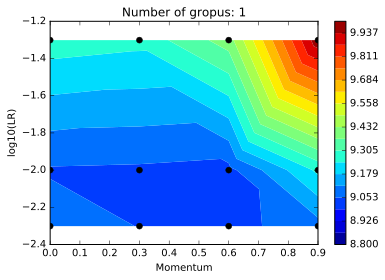

In [20]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=1, zrange=zr)

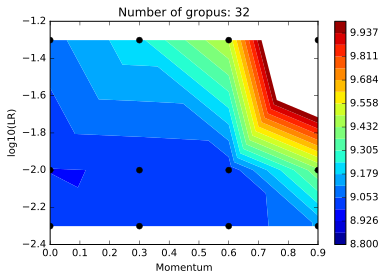

In [21]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=32, zrange=zr)

In [22]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=4, zrange=zr)

Only have 0 points. Cannot produce contour.


In [23]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=8, zrange=zr)

Only have 0 points. Cannot produce contour.


In [24]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=16, zrange=zr)

Only have 0 points. Cannot produce contour.


## Only plot the best run for each momentum value in each mode 

In [25]:
#dict_of_winners = get_best_for_each_momentum(loss_results,WINDOW)

### DASHED = ASYNC
### SOLID = SYNC

/Users/ioannis/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


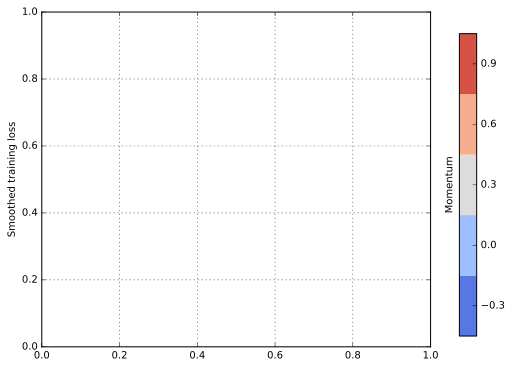

In [26]:
f = plot_all_runs(loss_results, window=WINDOW, two_panels=False, marker_dict=marker_dict, mark_every=100, CG=M)

In [27]:
# f=plot_momentum_dependence(loss_results, WINDOW)

## Plot winning curves along with evaluation loss level 

In [28]:
#f=plot_se_calculation(loss_results, WINDOW)

In [29]:
#f=plot_winners_snr(loss_results, WINDOW)

# Plot HE-SE

In [30]:
WINDOW=750

In [31]:
best_names, best_avg = get_best_for_each_cg(loss_results,window=WINDOW)

In [32]:
best_names

{1.0: 'IMAGENET1000-GPU-CG-1-0.005-0.6',
 32.0: 'IMAGENET1000-GPU-CG-32-0.01-0.0'}

32.0 4256
1.0 2880


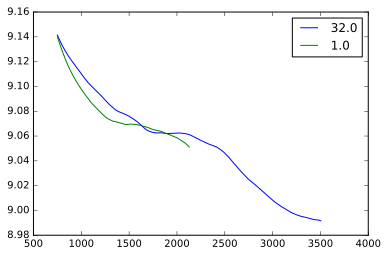

In [33]:
for folder in best_avg:
    plt.plot(best_avg[folder], label=folder)
    print folder, len(loss_results[best_names[folder]])
plt.legend()

[None, None, None, None]

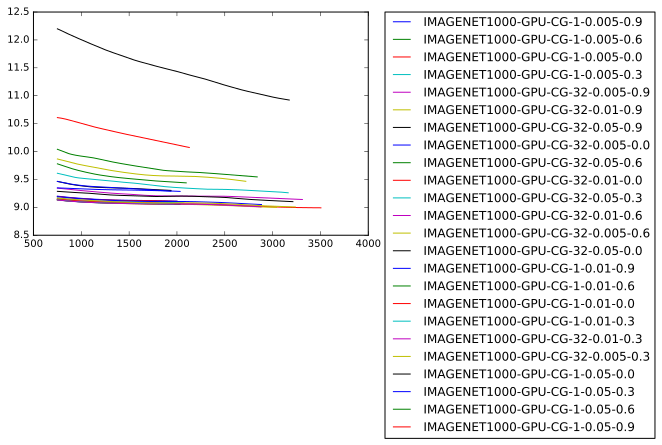

In [34]:
for folder in loss_results.keys():
    plt.plot(moving_average2(loss_results[folder], window_size=WINDOW), label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([None, None, None, None])

[ 0.42253521  0.2567028 ]


plotting.py:422: RuntimeWarning: invalid value encountered in less_equal
  meets = [np.argmax(best_avg[k]<=target) for k in best_avg ]


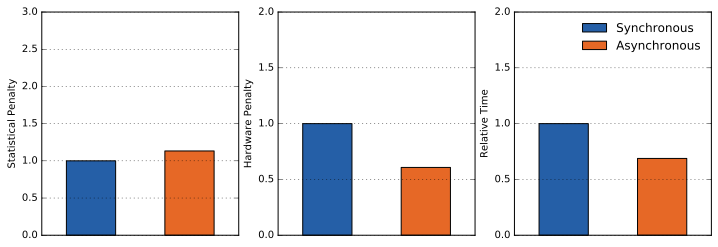

In [35]:
f = plot_se_he2(loss_results, WINDOW, 3, mean_times_dict=mean_times_dict)

In [36]:
f.savefig('tf0.9-imagenet1k-bars.png', bbox_inches='tight', pad_inches=0.1)

### Just 0.9

In [37]:
loss_results_09 = {}

In [38]:
list_of_runs_09 = []

In [39]:
for k in loss_results.keys():
    if params_from_folder_name(k)[2]=='0.9':
        loss_results_09[k] = loss_results[k]
        list_of_runs_09.append(k)

[ 0.44955045  0.27173913]


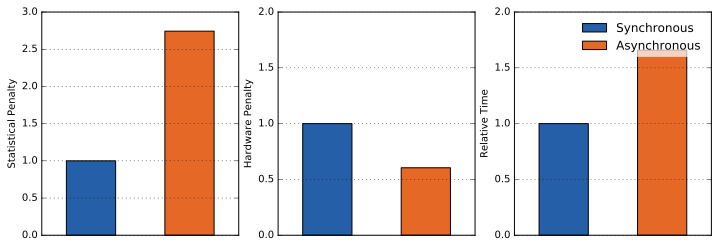

In [40]:
f = plot_se_he2(loss_results_09, WINDOW, 3, mean_times_dict=mean_times_dict)

In [41]:
f.savefig('tf0.9-imagenet1k-09.png', bbox_inches='tight', pad_inches=0.1)

In [42]:
best_names_09, best_avg_09 = get_best_for_each_cg(loss_results_09,window=WINDOW)

In [43]:
best_names

{1.0: 'IMAGENET1000-GPU-CG-1-0.005-0.6',
 32.0: 'IMAGENET1000-GPU-CG-32-0.01-0.0'}

In [44]:
best_names_09

{1.0: 'IMAGENET1000-GPU-CG-1-0.005-0.9',
 32.0: 'IMAGENET1000-GPU-CG-32-0.005-0.9'}

In [45]:
s = best_avg[1.0]

s09 = best_avg_09[1.0]

In [46]:
a = best_avg[32.0]

a09 = best_avg_09[32.0]

In [47]:
target = max(s[-1], s09[-1], a[-1], a09[-1])

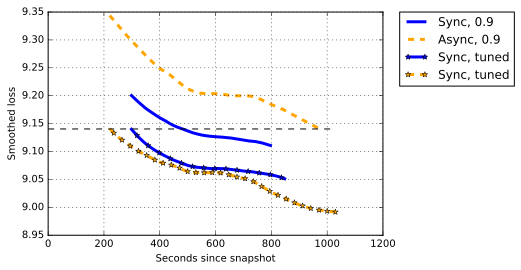

In [48]:
fig = plt.figure()


plt.plot(mean_times_dict['1']*np.arange(len(s09))/M,s09, '-', linewidth=3, c='blue', label='Sync, 0.9')
plt.plot(mean_times_dict['32']*np.arange(len(a09))/M,a09, '--', c='orange', linewidth=3, label='Async, 0.9')
plt.plot(mean_times_dict['1']*np.arange(len(s))/M,s, '-*', linewidth=3, markevery=100, c='blue', label='Sync, tuned')
plt.plot(mean_times_dict['32']*np.arange(len(a))/M,a, '--*', c='orange', markevery=100, linewidth=3, label='Sync, tuned')
plt.plot([0,mean_times_dict['32']*len(a)/M],2*[target],'--k')
plt.xlabel('Seconds since snapshot')
plt.ylabel('Smoothed loss')
#plt.axis([960, 980, None, None])
#plt.legend(['Sync: ' + best_sync_name, 'Async: ' + best_async_name, 'Evaluation level'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
#plt.title('Best run for each mode, loss used for SE calculation')
plt.grid()

In [49]:
fig.savefig('tf0.9-ImageNet1K-tune-vs-notune.png', bbox_inches='tight', pad_inches=0.1)

In [123]:
best_avg[folder]

array([        nan,         nan,         nan, ...,  9.02981996,
        9.02978953,  9.02975334])

In [133]:
mean_times_dict[params_from_folder_name(best_names[folder])[0]]

12.74358815816205

In [130]:
mean_times_dict

{'1': 12.74358815816205, '32': 9.4142732730227952}

In [131]:
folder

1.0

In [136]:
mean_times_dict[params_from_folder_name(best_names[folder])[0]]

9.4142732730227952

32.0 4256
1.0 2880


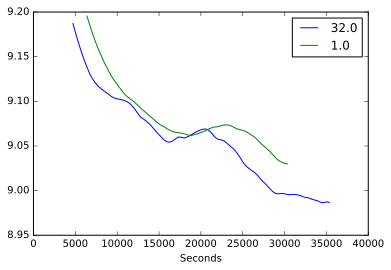

In [138]:
for folder in best_avg:
    plt.plot(mean_times_dict[params_from_folder_name(best_names[folder])[0]]*np.arange(1,len(best_avg[folder])+1), best_avg[folder], label=folder)
    plt.xlabel('Seconds')
    print folder, len(loss_results[best_names[folder]])
plt.legend()

In [115]:
times_09 = load_times(list_of_runs_09, M=M, data_dir=dataDir)

Loading run logs:
-----------------
IMAGENET1000-GPU-CG-1-0.005-0.9
IMAGENET1000-GPU-CG-32-0.005-0.9
IMAGENET1000-GPU-CG-32-0.01-0.9
IMAGENET1000-GPU-CG-32-0.05-0.9
IMAGENET1000-GPU-CG-1-0.01-0.9
IMAGENET1000-GPU-CG-1-0.05-0.9


In [116]:
list_of_runs_09

['IMAGENET1000-GPU-CG-1-0.005-0.9',
 'IMAGENET1000-GPU-CG-32-0.005-0.9',
 'IMAGENET1000-GPU-CG-32-0.01-0.9',
 'IMAGENET1000-GPU-CG-32-0.05-0.9',
 'IMAGENET1000-GPU-CG-1-0.01-0.9',
 'IMAGENET1000-GPU-CG-1-0.05-0.9']

In [117]:
loss_results_09.keys()

['IMAGENET1000-GPU-CG-1-0.005-0.9',
 'IMAGENET1000-GPU-CG-1-0.01-0.9',
 'IMAGENET1000-GPU-CG-32-0.005-0.9',
 'IMAGENET1000-GPU-CG-32-0.01-0.9',
 'IMAGENET1000-GPU-CG-32-0.05-0.9',
 'IMAGENET1000-GPU-CG-1-0.05-0.9']

In [118]:
times_09 = load_times(list_of_runs_09, M=M, data_dir=dataDir)

Loading run logs:
-----------------
IMAGENET1000-GPU-CG-1-0.005-0.9
IMAGENET1000-GPU-CG-32-0.005-0.9
IMAGENET1000-GPU-CG-32-0.01-0.9
IMAGENET1000-GPU-CG-32-0.05-0.9
IMAGENET1000-GPU-CG-1-0.01-0.9
IMAGENET1000-GPU-CG-1-0.05-0.9


##  Get basic timing stats

In [119]:
mean_times_dict_09 = mean_times(times_09, M=M)

IMAGENET1000-GPU-CG-1-0.005-0.9 :	12.8592231105
IMAGENET1000-GPU-CG-1-0.01-0.9 :	12.7089066092
IMAGENET1000-GPU-CG-32-0.005-0.9 :	8.84358025603
IMAGENET1000-GPU-CG-32-0.01-0.9 :	10.0298006338
IMAGENET1000-GPU-CG-32-0.05-0.9 :	9.1735143949
IMAGENET1000-GPU-CG-1-0.05-0.9 :	12.2536222222

------------------------------------------------------
Mode	Mean batch time
------------------------------------------------------
CG 1	12.6072506473
CG 32	9.34896509492
------------------------------------------------------

------------------------------------------------------
Mode	Mean batch time	Steps/worker	Active time (minutes)
------------------------------------------------------
CG 1	12.6072506473 8416.0 	55.261782004
CG 32	9.34896509492 11458.0 	55.791896905
------------------------------------------------------
